In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [2]:
### 特征值和特征向量  https://www.cnblogs.com/zwt20120701/p/11008275.html
### 成对出现

A = np.matrix([[3, 7],[2, 5]])
inva = np.linalg.inv(A)
print('矩阵的逆', inva)
print('矩阵和逆矩阵点乘:', A.dot(inva))

eigvals, eigvecs = (np.linalg.eig(A))
print('特征值:' , eigvals)
print('特征向量:', eigvecs)
print('对角矩阵:', np.diag(eigvals))
## 知道特征值和特征向量后, 就可以进行逆向运算,计算原始的矩阵,公式如下:
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
print(S)

矩阵的逆 [[ 5. -7.]
 [-2.  3.]]
矩阵和逆矩阵点乘: [[ 1.00000000e+00 -1.33226763e-15]
 [ 6.66133815e-16  1.00000000e+00]]
特征值: [0.12701665 7.87298335]
特征向量: [[-0.92511345 -0.82071729]
 [ 0.37969079 -0.57133452]]
对角矩阵: [[0.12701665 0.        ]
 [0.         7.87298335]]
[[3. 7.]
 [2. 5.]]


In [ ]:
### 模拟特征值丢失现象
## Ax=rx --> r特征值, x特征向量
## A = rx*(x的逆)
arr = np.matrix([[1, 6, 3, 7],[3, 8, 4, 6], [1, 4, 9, 5], [6, 8, 3, 5]])
print('原始矩阵:', arr, sep='\n')
## 提取特征和特征向量
eigvals, eigvecs = np.linalg.eig(arr)
print('特征值:', eigvals, sep='\n')
print('特征向量:', eigvecs, sep='\n')
diag = np.diag(eigvals)
print('对角阵', diag, sep='\n')
## 逆运算,推算原始矩阵
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
print('逆运算,计算原始矩阵:', S, sep='\n')

## 模拟特征值丢失第四个元素值
eigvals[3:] = 0
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
print('逆运算,计算原始矩阵(丢失部份特征):', S, sep='\n')

![百合花](./资料/百合花.jpg)

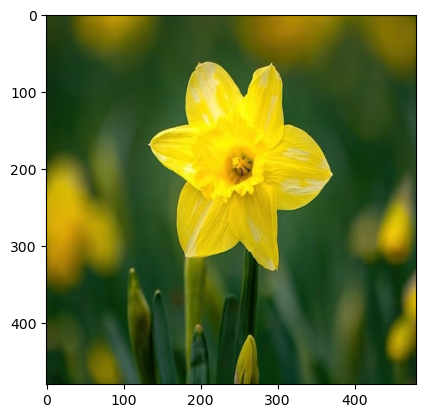

In [4]:
image = mpimg.imread('./资料/百合花.jpg')
type(image)
plt.imshow(image)

(480, 480, 3)
[41 67 20]
(480, 480)
灰度形状: (480, 480)


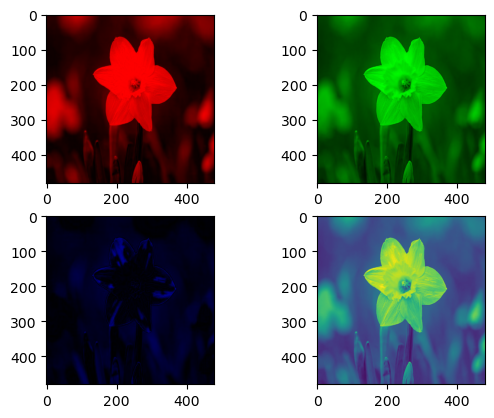

In [5]:
## 提取图片特征 -- 只能是方阵图片--正方形
## 提取图片特征
print(image.shape)
## 第一个像素点的rgb值
print(image[0, 0])
print(image[:,:,0].shape)

fig, ax = plt.subplots(2, 2)

## 红色通道
r_im = image.copy()
r_im[:,:,1]=0
r_im[:,:,2]=0
ax[0, 0].imshow(r_im)

## 绿色通道
g_im = image.copy()
g_im[:,:,0]=0
g_im[:,:,2]=0
ax[0,1].imshow(g_im)

## 蓝色通道
b_im = image.copy()
b_im[:,:,0]=0
b_im[:,:,1]=0
ax[1,0].imshow(b_im)

# 转换为灰度
gray_img = image.copy()
gray_img = np.dot(gray_img[..., :3], [0.2989, 0.5870, 0.1140])
print("灰度形状:", gray_img.shape) ## 3为图片转成2维了!!!
ax[1,1].imshow(gray_img)

plt.show()


(480,) (480, 480)


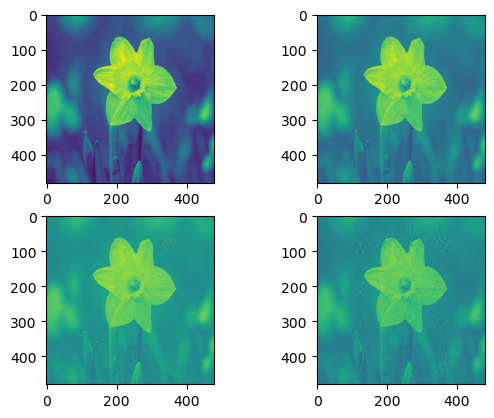

In [6]:
## 特征提取 - 正方形
gray_matrix = np.matrix(gray_img)
eigvals, eigvecs = np.linalg.eig(gray_matrix)
print(eigvals.shape, eigvecs.shape)
diag = np.diag(eigvals)

fig = plt.figure()
fig.add_subplot(221)
### 保留全部特征
S = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S = S.real ## 只拿实部
plt.imshow(S)

fig.add_subplot(222)
## 丢掉一半特征
eigvals[240:]=0
S1 = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S1 = S1.real ## 只拿实部
plt.imshow(S1)

fig.add_subplot(223)
## 丢掉3/4特征
eigvals[120:]=0
S1 = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S1 = S1.real ## 只拿实部
plt.imshow(S1)

fig.add_subplot(224)
## 丢掉7/8特征
eigvals[60:]=0
S1 = np.matrix(eigvecs) * np.matrix(np.diag(eigvals)) * np.matrix(eigvecs.I)
S1 = S1.real ## 只拿实部
plt.imshow(S1)

plt.show()

In [ ]:
## 奇异值分解
mat = np.matrix([[4, 11, 14], [3, 7, -2]])
U, sv, V = np.linalg.svd(mat, full_matrices=False)
print('U:', U)
print('sv:', sv)
print('V:', V)
print('U * U.T ', U * U.T)
print('V * V.T ', V * V.T)
sv = np.diag(sv)
print('U * sv * V', U * sv * V) ## 会报错,方阵问题

![荷花](./资料/荷花.jpg)

灰度形状: (427, 640)


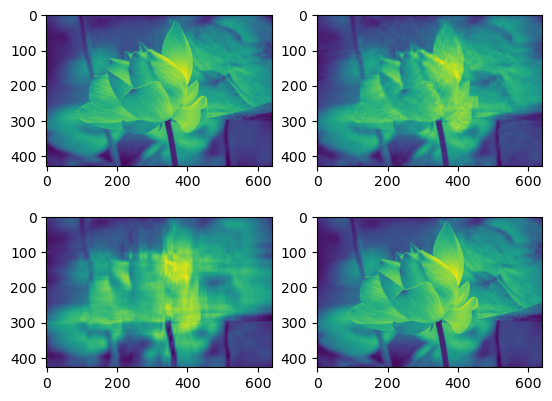

In [8]:
### 奇异值分解
## U x S x V = M, U和V都是正交矩阵, S是主对角线上有值,其他元素为0,那么S则称为M的奇异值
## 和特征值、特征向量的区别,就是奇异值类似因式分解,U和V是2个特征向量,sv是特征值
image2 = mpimg.imread('./资料/荷花.jpg')

# 转换为灰度
gray_img2 = image2.copy()
gray_img2 = np.dot(gray_img2[..., :3], [0.2989, 0.5870, 0.1140])
print("灰度形状:", gray_img2.shape) ## 3为图片转成2维了!!!

gi2 = np.matrix(gray_img2)
## full_matrices代表返回的U、V必须都是方阵,这样会导致逆运算的时候,U*sv*V不可计算
U, sv, V = np.linalg.svd(gi2, full_matrices=False)
# print('U shape:', U.shape)
# print(U * U.T)
# print('sv shape:', sv.shape)
# print('V shape:', V.shape)
# print(V * V.T)

fig = plt.figure()
fig.add_subplot(221)
### 保留全部特征
S = U * np.diag(sv) * V
plt.imshow(S)

fig.add_subplot(222)
## 只保留20个特征
sv[20:] = 0
S1 = U * np.diag(sv) * V
plt.imshow(S1)

fig.add_subplot(223)
## 只保留5个特征
sv[10:] = 0
S1 = U * np.diag(sv) * V
plt.imshow(S1)

fig.add_subplot(224)
## 原始图像
plt.imshow(gray_img2)

plt.show()